## Demographic Income Analysis


## Objective:


The project aims to analyze the "Adult" dataset, which includes demographic and income information, to explore and evaluate how various features influence income levels (particularly whether a person earns more or less than $50K). The analysis begins with loading the data, handling missing values, and performing exploratory data analysis (EDA). The goal is to identify key patterns in the data, preprocess it for machine learning models, and assess model performance in predicting income levels.

Below mentioned are the steps to be followed:

<b>Part 1</b>
1. Load the data
2. Understand and Viz the data
    - Missing value treatment
    - EDA
3. Data Preparation
    - Removing Outliers and uneccessary columns
    - Categorical variable treatment
    - Standardizing numerical variables
    - Train Test Split
4. Training the Model
5. Prediction
    - Making Predictions
6. Evaluation

<b>Part 2</b> Automatic Feature Elimination using RFE

<b>Part 3</b> Principal Component Analysis

In [6]:
# Importing the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

### Step 1: Load the data

In [8]:
df = pd.read_csv(r"D:\ML PROJECTS\Adult\adult.csv")

### Step 2: Understand and Viz the data

In [9]:
# Looking at the dataset
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [10]:
# Dimensionality check
df.shape

(48842, 15)

In [11]:
# Column data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [12]:
# Statistical analysis
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


<b>Observations :

In [13]:
df.isin(['?']).sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [14]:
df.replace('?', np.nan, inplace=True)
df.isin(['?']).sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [15]:
df.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [16]:
# Percentage of missing values.
round(df.isnull().sum() * 100 / len(df.index), 2)

age                0.00
workclass          5.73
fnlwgt             0.00
education          0.00
educational-num    0.00
marital-status     0.00
occupation         5.75
relationship       0.00
race               0.00
gender             0.00
capital-gain       0.00
capital-loss       0.00
hours-per-week     0.00
native-country     1.75
income             0.00
dtype: float64

In [17]:
df = df.loc[df['native-country'].notnull(), :]
round(df.isnull().sum() * 100 / len(df.index), 2)

age                0.00
workclass          5.74
fnlwgt             0.00
education          0.00
educational-num    0.00
marital-status     0.00
occupation         5.76
relationship       0.00
race               0.00
gender             0.00
capital-gain       0.00
capital-loss       0.00
hours-per-week     0.00
native-country     0.00
income             0.00
dtype: float64

In [18]:
df = df.loc[df['occupation'].notnull(), :]
round(df.isnull().sum() * 100 / len(df.index), 2)

age                0.0
workclass          0.0
fnlwgt             0.0
education          0.0
educational-num    0.0
marital-status     0.0
occupation         0.0
relationship       0.0
race               0.0
gender             0.0
capital-gain       0.0
capital-loss       0.0
hours-per-week     0.0
native-country     0.0
income             0.0
dtype: float64

In [19]:
df.shape

(45222, 15)

In [20]:
# Percentage of rows lost in data cleaning.

(48842 - len(df.index)) * 100 / 48842

7.411653904426518

<b>So, we have lost 7.41% of the rows from the dataframe. This is fine considering that we have more than 45,000 datapoints in the dataframe.

In [21]:
num_attributes = df.select_dtypes(include=['int64'])
print(num_attributes.columns)

Index(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'fnlwgt'}>],
       [<Axes: title={'center': 'educational-num'}>,
        <Axes: title={'center': 'capital-gain'}>],
       [<Axes: title={'center': 'capital-loss'}>,
        <Axes: title={'center': 'hours-per-week'}>]], dtype=object)

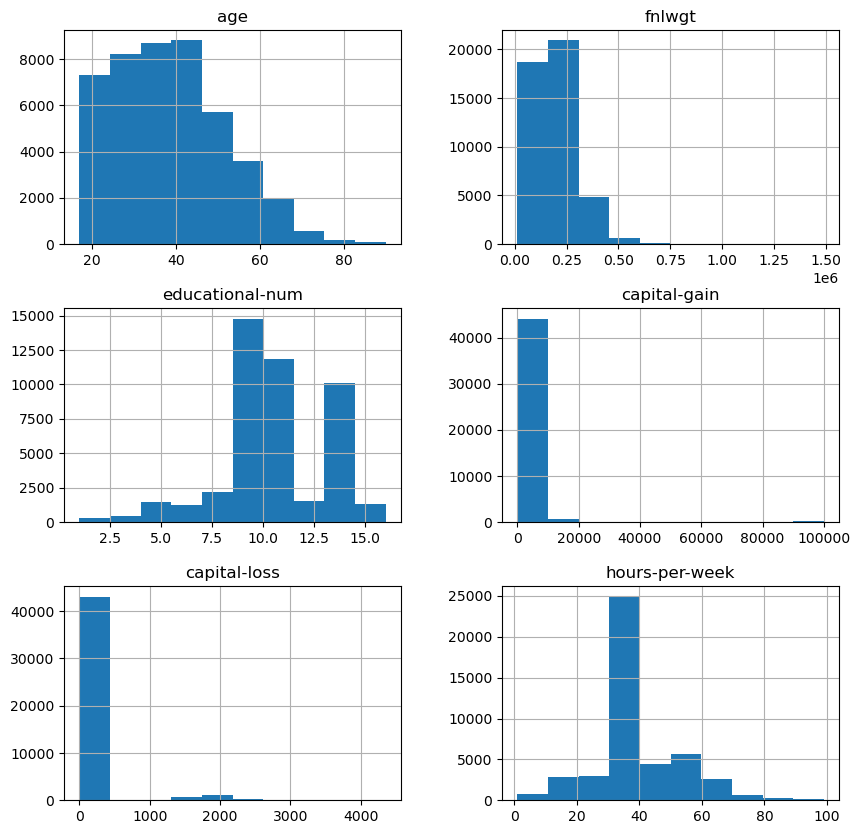

In [22]:
num_attributes.hist(figsize=(10,10))

In [23]:
cat_attributes = df.select_dtypes(include=['object'])
print(cat_attributes.columns)

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country', 'income'],
      dtype='object')


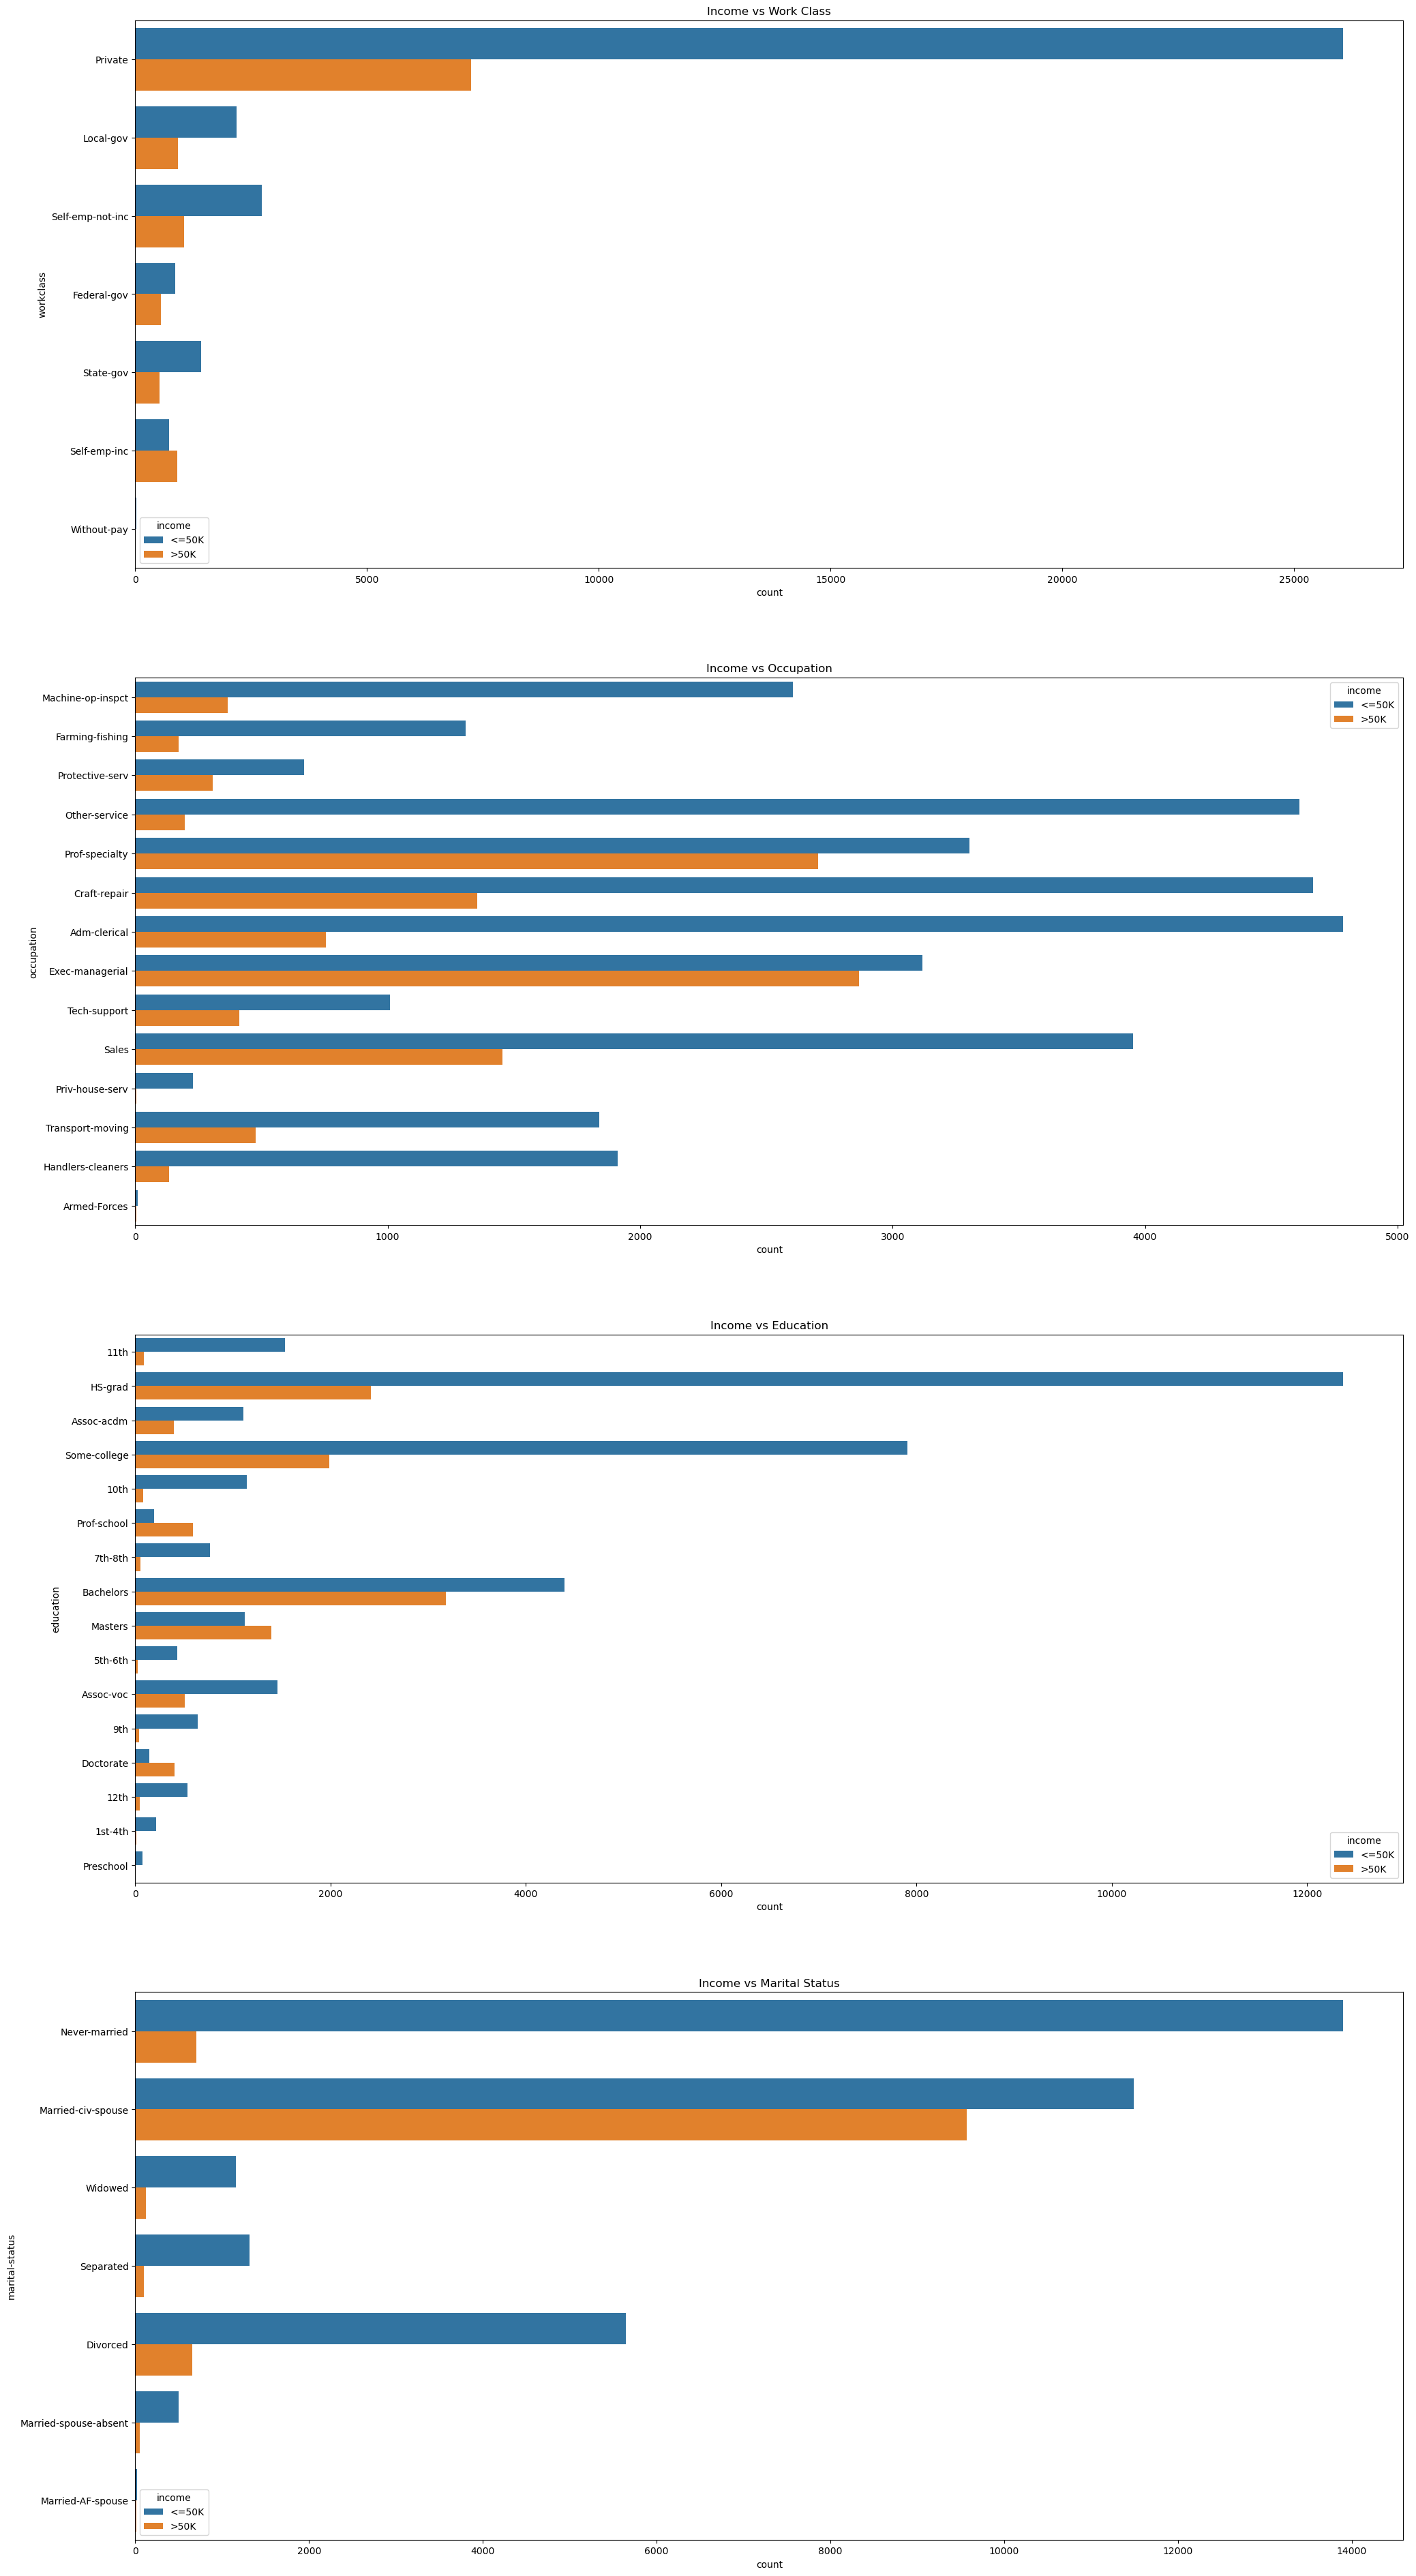

In [24]:
plt.figure(figsize=(24, 48))

plt.subplot(411)
sns.countplot(y='workclass', hue='income', data = cat_attributes)
plt.title('Income vs Work Class')

plt.subplot(412)
sns.countplot(y='occupation', hue='income', data = cat_attributes)
plt.title('Income vs Occupation')

plt.subplot(413)
sns.countplot(y='education', hue='income', data=cat_attributes)
plt.title('Income vs Education')

plt.subplot(414)
sns.countplot(y='marital-status', hue='income', data=cat_attributes)
plt.title('Income vs Marital Status')

plt.show()

In [25]:
df['income'].value_counts()

income
<=50K    34014
>50K     11208
Name: count, dtype: int64

In [26]:
df['income'].value_counts(normalize = True)

income
<=50K    0.752156
>50K     0.247844
Name: proportion, dtype: float64

In [27]:
# Percentage of working men and women

df['gender'].value_counts(normalize=True)

gender
Male      0.675048
Female    0.324952
Name: proportion, dtype: float64

In [28]:
df['income_category'] = "null"
df.loc[df['income'] == '>50K', ['income_category']] = 'high income'
df.loc[df['income'] == '<=50K', ['income_category']] = 'low income'
df.loc[:, 'income_category'].head()

0     low income
1     low income
2    high income
3    high income
5     low income
Name: income_category, dtype: object

In [29]:
# Now I am interested in looking at the racewise distribution of income.

racewise_income_dist = df.pivot_table(values=['income_category'], 
                                      index=['income', 'race'], 
                                      aggfunc = 'count')
racewise_income_dist

income_category
income race                               
<=50K  Amer-Indian-Eskimo              382
       Asian-Pac-Islander              934
       Black                          3694
       Other                           308
       White                         28696
>50K   Amer-Indian-Eskimo               53
       Asian-Pac-Islander              369
       Black                           534
       Other                            45
       White                         10207

In [30]:
# Let us also look into the racewise gender distibution of income

racewise_income_dist = df.pivot_table(values=['income_category'], 
                                      index=['income', 'race', 'gender'], 
                                      aggfunc = 'count')
racewise_income_dist

income_category
income race               gender                 
<=50K  Amer-Indian-Eskimo Female              152
                          Male                230
       Asian-Pac-Islander Female              371
                          Male                563
       Black              Female             1958
                          Male               1736
       Other              Female              117
                          Male                191
       White              Female            10428
                          Male              18268
>50K   Amer-Indian-Eskimo Female               14
                          Male                 39
       Asian-Pac-Islander Female               65
                          Male                304
       Black              Female              126
                          Male                408
       Other              Female                9
                          Male                 36
       White              Female             1455
                          Male               8752

<b>From the above table, you can see that the difference in the number of men and women earning salary above 50,000 is huge across all races. Interestingly, more black females earn a salary of USD 50,000 or less compared to black men. 

In [31]:
df.pivot_table(values=['income'], index=['workclass', 'gender'], aggfunc='count')

income
workclass        gender        
Federal-gov      Female     445
                 Male       961
Local-gov        Female    1244
                 Male      1856
Private          Female   11428
                 Male     21879
Self-emp-inc     Female     199
                 Male      1447
Self-emp-not-inc Female     617
                 Male      3179
State-gov        Female     755
                 Male      1191
Without-pay      Female       7
                 Male        14

<b> Private sector provides most jobs

In [32]:
# Relationship-wise salary distribution for low income group

relationship_wise_low_income = df.loc[df['income'] == '<=50K', :].pivot_table(values=['income'], index=['relationship'], aggfunc='count')
relationship_wise_low_income['percent'] = round(relationship_wise_low_income['income'] * 100 / relationship_wise_low_income['income'].sum(), 2)
relationship_wise_low_income

,income,percent
relationship,,
Husband,10159,29.87
Not-in-family,10474,30.79
Other-relative,1299,3.82
Own-child,6521,19.17
Unmarried,4486,13.19
Wife,1075,3.16


In [33]:
# Relationship-wise salary distribution for high income group

relationship_wise_high_income = df.loc[df['income'] == '>50K', :].pivot_table(values=['income'], index=['relationship'], aggfunc='count')
relationship_wise_high_income['percent'] = round(relationship_wise_high_income['income'] * 100 / relationship_wise_high_income['income'].sum(), 2)
relationship_wise_high_income

,income,percent
relationship,,
Husband,8507,75.90
Not-in-family,1228,10.96
Other-relative,50,0.45
Own-child,105,0.94
Unmarried,302,2.69
Wife,1016,9.06


<b>In the high income group, about 75% of people are husbands whereas in low income group, the percentage share is quite well distribted between husbands, own childs and people who are not a part of any family.

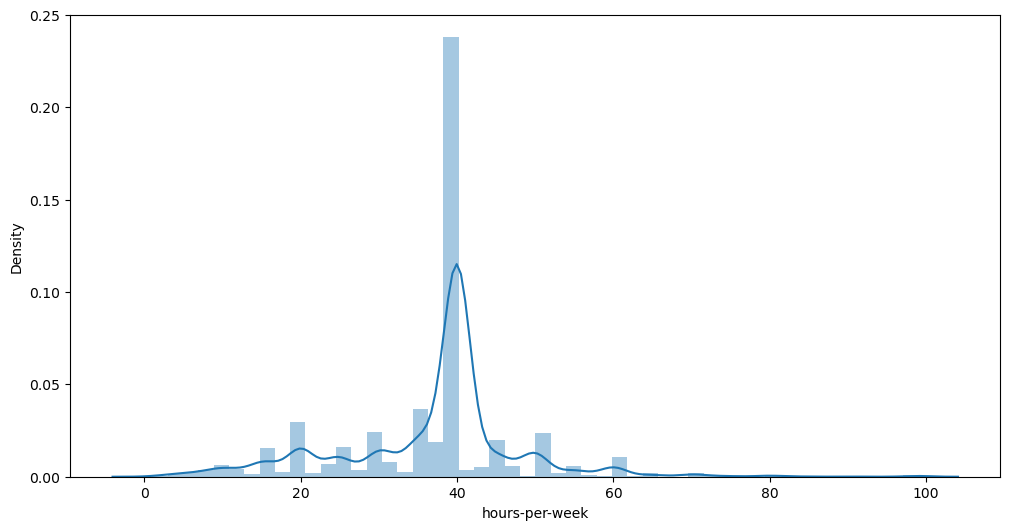

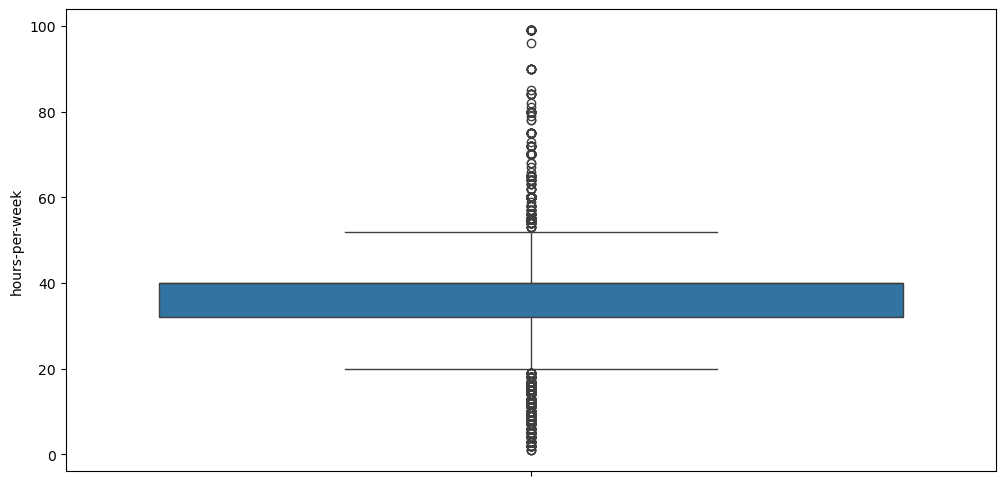

In [34]:
# Plotting distribution and box plots for the number of working hours for females.
working_hours_female = df.loc[df['gender'] == 'Female', ['hours-per-week']]

# Distribution plot
plt.figure(figsize=(12, 6))
sns.distplot(working_hours_female['hours-per-week'])
plt.show()

# Boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(working_hours_female['hours-per-week'])
plt.show()

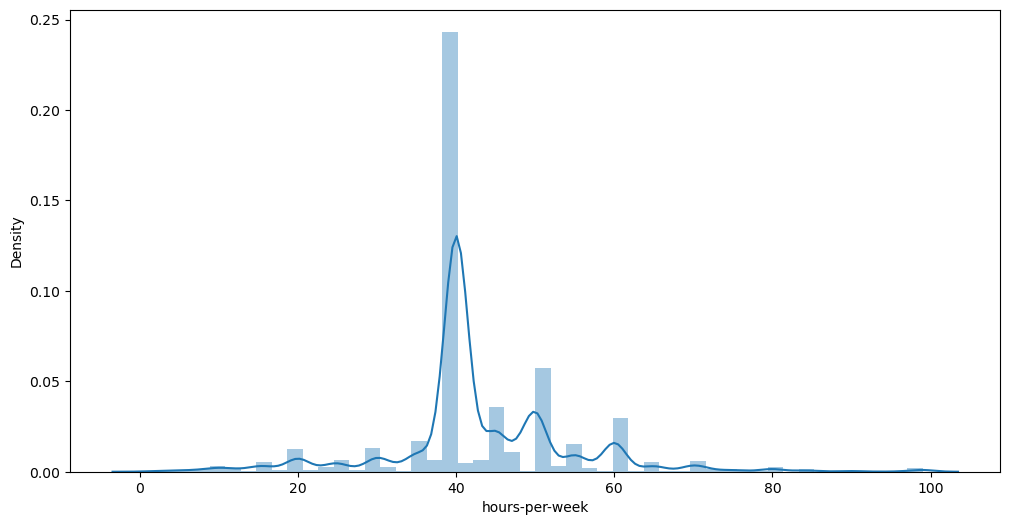

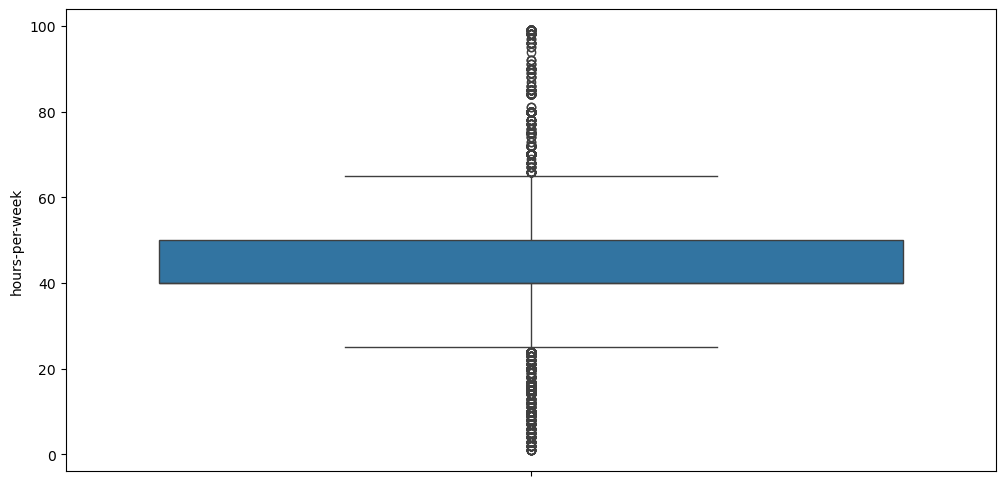

In [35]:
# Plotting distribution and box plots for the number of working hours for females.
working_hours_male = df.loc[df['gender'] == 'Male', ['hours-per-week']]

# Distribution plot
plt.figure(figsize=(12, 6))
sns.distplot(working_hours_male['hours-per-week'])
plt.show()

# Boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(working_hours_male['hours-per-week'])
plt.show()

<b> There are lot of outliers in the 'hours-per-week' data both for males and females.

<Axes: xlabel='income', ylabel='hours-per-week'>

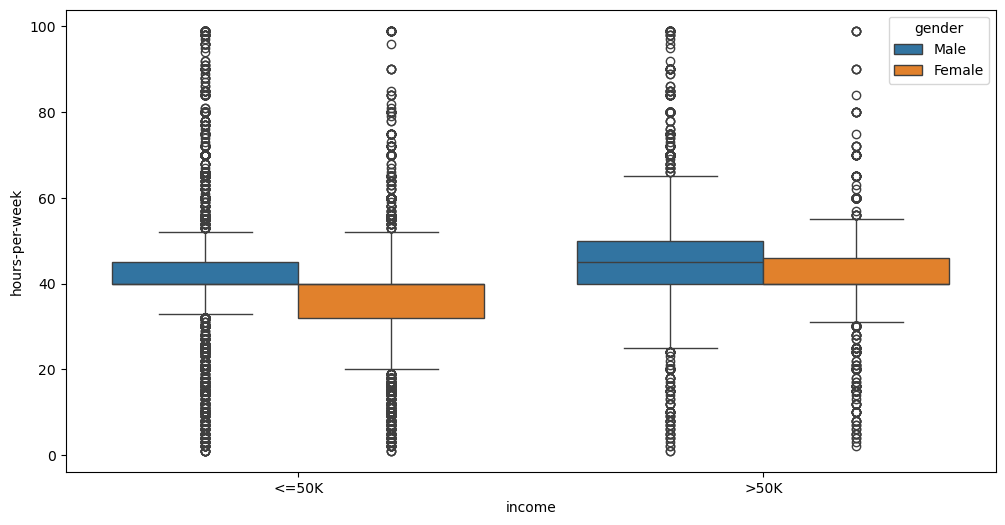

In [36]:
# Grouped boxplot for income, gender and number of hours per week.

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='income', y='hours-per-week', hue='gender')

<b>From the boxplot above, it can be concluded that men worked for few more hours than women in both the salary brackets.

<Axes: xlabel='income', ylabel='age'>

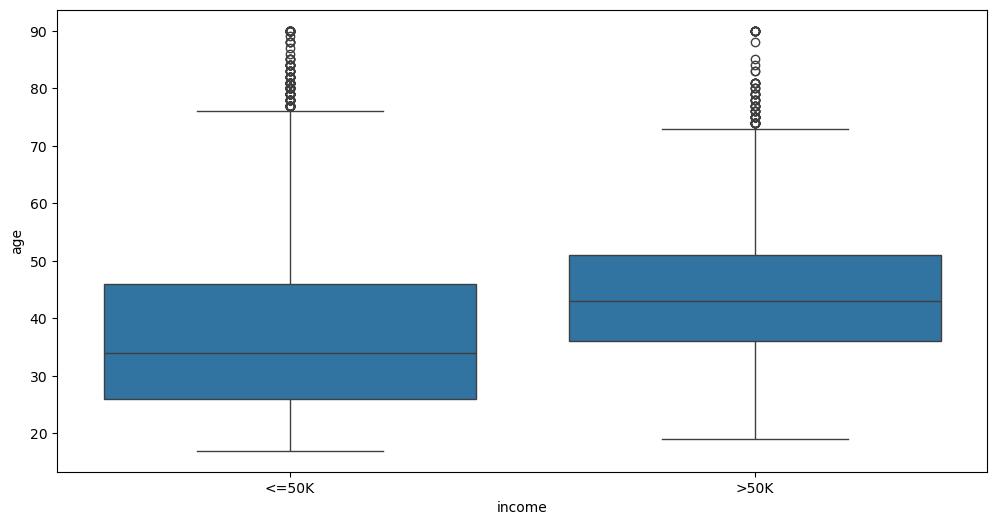

In [37]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='income', y='age')

### Step 3: Data Prepration

##### Removing outliers and unnecessary columns

In [38]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income', 'income_category'],
      dtype='object')

In [39]:
print(f"Number of columns before deleting: {df.shape[1]}")

del_cols = ['fnlwgt','education']
df.drop(labels = del_cols, axis = 1, inplace = True)
print(f"Number of columns after deleting: {df.shape[1]}")

Number of columns before deleting: 16
Number of columns after deleting: 14


In [40]:
# drop rows with age 90
print("Number of observation before removing:", df.shape)
index_age = df[df['age'] == 90].index
df.drop(labels = index_age, axis = 0, inplace =True)
print("Number of observation after removing:", df.shape)

Number of observation before removing: (45222, 14)
Number of observation after removing: (45176, 14)


In [41]:
#drop rows with capital gain = 99999
print("Number of observation before removing:",df.shape)
index_gain = df[df['capital-gain'] == 99999].index
df.drop(labels = index_gain,axis = 0,inplace =True)
print("Number of observation after removing:",df.shape)

Number of observation before removing: (45176, 14)
Number of observation after removing: (44947, 14)


In [42]:
df.drop('income_category', axis=1, inplace=True)

In [43]:
categorical = df.select_dtypes(include=['object'])

categorical.head()

,workclass,marital-status,occupation,relationship,race,gender,native-country,income
0,Private,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States,<=50K
1,Private,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States,<=50K
2,Local-gov,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States,>50K
3,Private,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,United-States,>50K
5,Private,Never-married,Other-service,Not-in-family,White,Male,United-States,<=50K


In [44]:
numerical = df.select_dtypes(include=['int64', 'float64'])

numerical.head()

,age,educational-num,capital-gain,capital-loss,hours-per-week
0,25,7,0,0,40
1,38,9,0,0,50
2,28,12,0,0,40
3,44,10,7688,0,40
5,34,6,0,0,30


In [45]:
# scaling the numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# column names are (annoyingly) lost after Scaling
# (i.e. the dataframe is converted to a numpy ndarray)

df_num = pd.DataFrame(scaler.fit_transform(numerical), 
                      columns = numerical.columns)

df_num.head()

,age,educational-num,capital-gain,capital-loss,hours-per-week
0,-1.025420,-1.219743,-0.232520,-0.219315,-0.074097
1,-0.034670,-0.433575,-0.232520,-0.219315,0.760953
2,-0.796786,0.745676,-0.232520,-0.219315,-0.074097
3,0.422600,-0.040492,2.767105,-0.219315,-0.074097
4,-0.339516,-1.612827,-0.232520,-0.219315,-0.909146


In [48]:
# Encoding the categorical features

from sklearn.preprocessing import OneHotEncoder

# Initialize the OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse_output=False)  # sparse_output is used instead of sparse in recent versions

# Fit and transform the categorical data
df_cat = pd.DataFrame(encoder.fit_transform(categorical), 
                      columns=encoder.get_feature_names_out(categorical.columns))

# Display the resulting DataFrame
df_cat.head()


,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_>50K
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [49]:
df = pd.concat([df_num, df_cat], axis=1)

df.head()

,age,educational-num,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_>50K
0,-1.025420,-1.219743,-0.232520,-0.219315,-0.074097,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-0.034670,-0.433575,-0.232520,-0.219315,0.760953,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,-0.796786,0.745676,-0.232520,-0.219315,-0.074097,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.422600,-0.040492,2.767105,-0.219315,-0.074097,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,-0.339516,-1.612827,-0.232520,-0.219315,-0.909146,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [50]:
y = df.pop('income_>50K')

X = df

In [51]:
# split into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

In [52]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(31462, 80) (31462,)
(13485, 80) (13485,)


### Step 4: Training the Model

In [53]:
from sklearn.linear_model import LogisticRegression

clf_logit = LogisticRegression()

clf_logit.fit(X_train, y_train)

LogisticRegression()

### Step 5: Testing

In [54]:
X_test.head()

,age,educational-num,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
22251,-1.635113,-1.612827,-0.23252,-0.219315,-2.579245,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
15880,0.193965,0.352592,-0.23252,-0.219315,-0.074097,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
21910,0.270177,0.352592,-0.23252,-0.219315,0.760953,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
28131,-1.254055,-1.612827,-0.23252,4.122404,-1.326671,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
27660,0.193965,-0.040492,-0.23252,-0.219315,0.760953,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [55]:
y_test_pred = clf_logit.predict(X_test)

### Step 6: Model Evaluation

In [56]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_test_pred)

0.8460511679644049

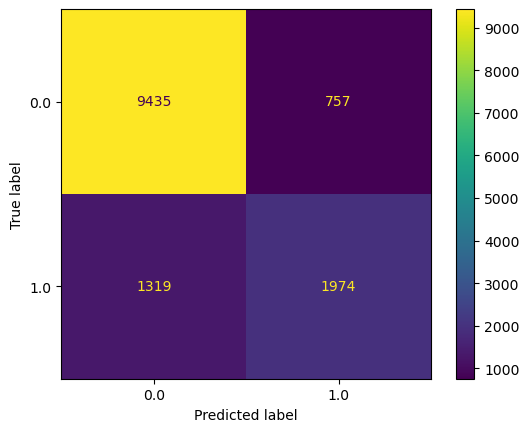

In [59]:
from sklearn.metrics import ConfusionMatrixDisplay



# Make predictions on the test set
y_pred = clf_logit.predict(X_test)

# Plot the confusion matrix
ConfusionMatrixDisplay.from_estimator(clf_logit, X_test, y_test)


In [58]:
print(metrics.classification_report(y_test, y_test_pred))

# Number of features = 80

              precision    recall  f1-score   support

         0.0       0.88      0.93      0.90     10192
         1.0       0.72      0.60      0.66      3293

    accuracy                           0.85     13485
   macro avg       0.80      0.76      0.78     13485
weighted avg       0.84      0.85      0.84     13485



In [60]:
prob = clf_logit.predict_proba(X_test)
prob = prob[:, 1]
roc_auc = metrics.roc_auc_score(y_test, prob)
print(roc_auc)

0.9028694316615665


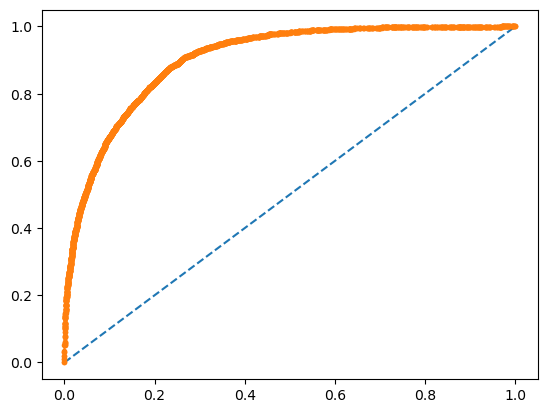

In [65]:
from sklearn import metrics
import matplotlib.pyplot as plt

# Get predicted probabilities for both classes
# Assuming clf_logit is your trained classifier
prob = clf_logit.predict_proba(X_test)[:, 1]  

# Calculate False Positive Rate, True Positive Rate, and thresholds
fpr, tpr, thresholds = metrics.roc_curve(y_test, prob)

# Plot the diagonal reference line
plt.plot([0, 1], [0, 1], linestyle='--')

# Plot the ROC curve
plt.plot(fpr, tpr, marker='.')

# Show the plot
plt.show()


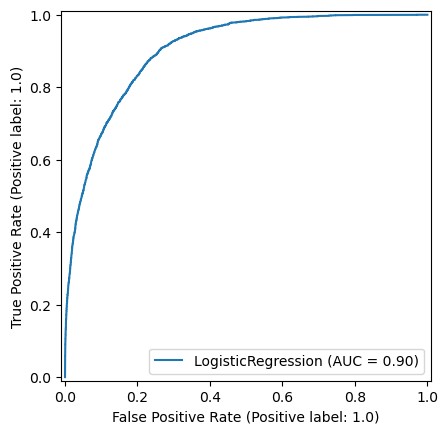

In [67]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(clf_logit, X_test, y_test)
plt.show()


## Feature Elimination using RFE

<Axes: >

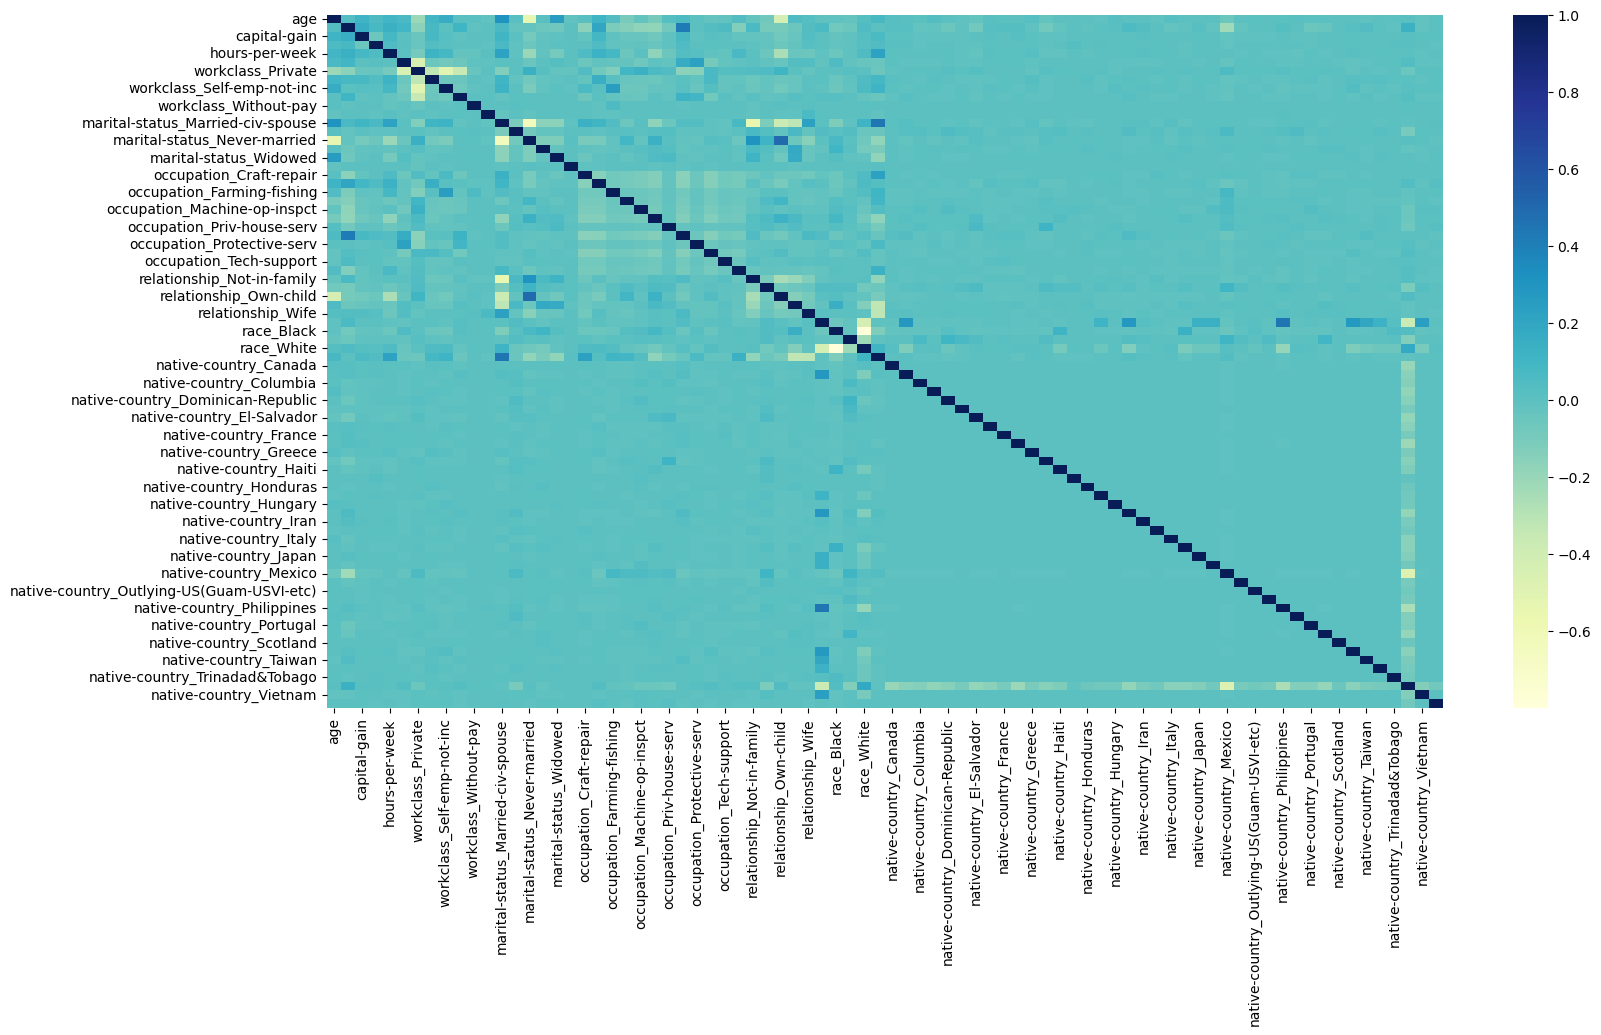

In [68]:
plt.figure(figsize=(18, 9))
sns.heatmap(X_train.corr(), cmap="YlGnBu")

In [70]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

clf_logit_rfe = LogisticRegression()

rfe = RFE(clf_logit_rfe)
rfe = rfe.fit(X_train, y_train)

In [71]:
temp_df = pd.DataFrame({'Columns' : X_train.columns, 'Included' : rfe.support_, 'Ranking' : rfe.ranking_})

temp_df.loc[temp_df.Included == True, :]

,Columns,Included,Ranking
0,age,True,1
1,educational-num,True,1
2,capital-gain,True,1
4,hours-per-week,True,1
8,workclass_Self-emp-not-inc,True,1
10,workclass_Without-pay,True,1
11,marital-status_Married-AF-spouse,True,1
12,marital-status_Married-civ-spouse,True,1
14,marital-status_Never-married,True,1
19,occupation_Exec-managerial,True,1


In [72]:
X_train_cols = list(X_train.columns[rfe.support_])

In [73]:
len(X_train_cols)

40

In [74]:
X_train_rfe = X_train[X_train_cols]

X_train_rfe.shape

(31462, 40)

<Axes: >

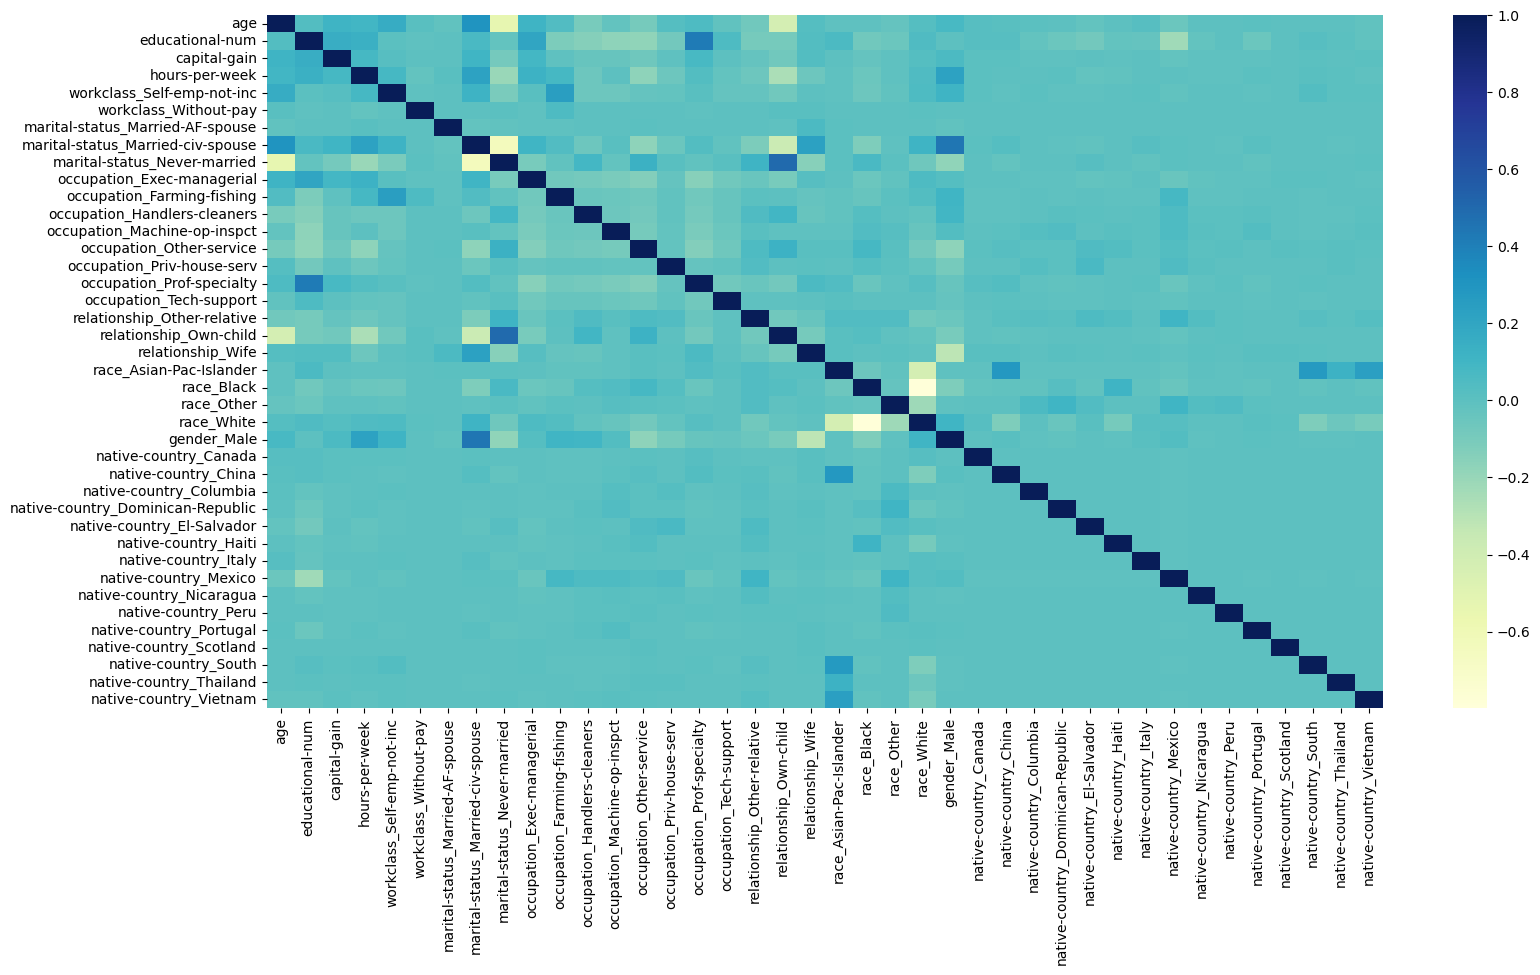

In [75]:
plt.figure(figsize=(18, 9))
sns.heatmap(X_train_rfe.corr(), cmap="YlGnBu")

In [76]:
clf_logit_rfe.fit(X_train_rfe, y_train)

LogisticRegression()

In [77]:
X_test_rfe = X_test[X_train_cols]

In [78]:
y_test_pred_rfe = clf_logit_rfe.predict(X_test_rfe)

In [79]:
metrics.accuracy_score(y_test, y_test_pred_rfe)

0.8413051538746755

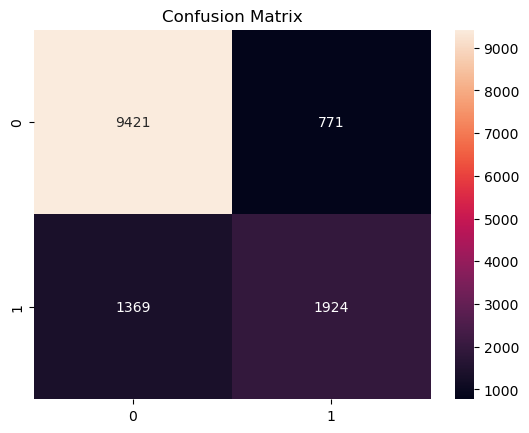

In [80]:
sns.heatmap(metrics.confusion_matrix(y_test, y_test_pred_rfe), annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

In [81]:
print(metrics.classification_report(y_test, y_test_pred_rfe))

              precision    recall  f1-score   support

         0.0       0.87      0.92      0.90     10192
         1.0       0.71      0.58      0.64      3293

    accuracy                           0.84     13485
   macro avg       0.79      0.75      0.77     13485
weighted avg       0.83      0.84      0.84     13485



In [82]:
prob_rfe = clf_logit_rfe.predict_proba(X_test_rfe)
prob_rfe = prob_rfe[:, 1]
roc_auc_rfe = metrics.roc_auc_score(y_test, prob_rfe)
print(roc_auc_rfe)

0.8987798525820194


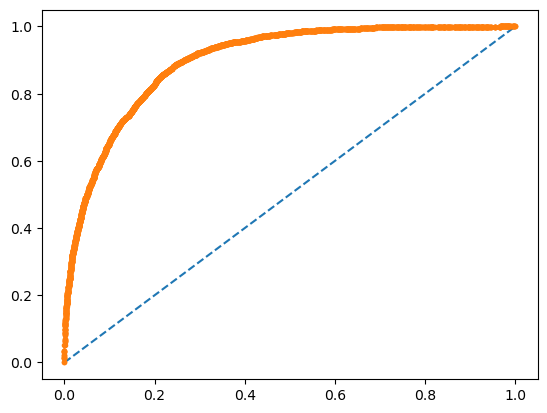

In [83]:
# ploting roc curve
fpr_rfe, tpr_rfe, thresholds_rfe = metrics.roc_curve(y_test, prob_rfe)

plt.plot([0, 1], [0, 1], linestyle='--')

# Plot the roc curve for the model
plt.plot(fpr_rfe, tpr_rfe, marker='.')
plt.show()

## Principal Component Analysis

In [84]:
X_train.shape

(31462, 80)

In [85]:
X_train.head()

,age,educational-num,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
14479,-1.558902,-0.433575,-0.23252,-0.219315,-0.074097,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
14944,0.346388,1.531844,-0.23252,4.467376,0.760953,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9772,-0.949209,-0.433575,-0.23252,-0.219315,0.343428,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
39549,0.803658,-0.433575,-0.23252,4.467376,-0.074097,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
30631,0.270177,1.531844,-0.23252,-0.219315,1.596002,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [86]:
from sklearn.decomposition import PCA
pca = PCA(random_state = 0)

In [87]:
pca.fit(X_train)

PCA(random_state=0)

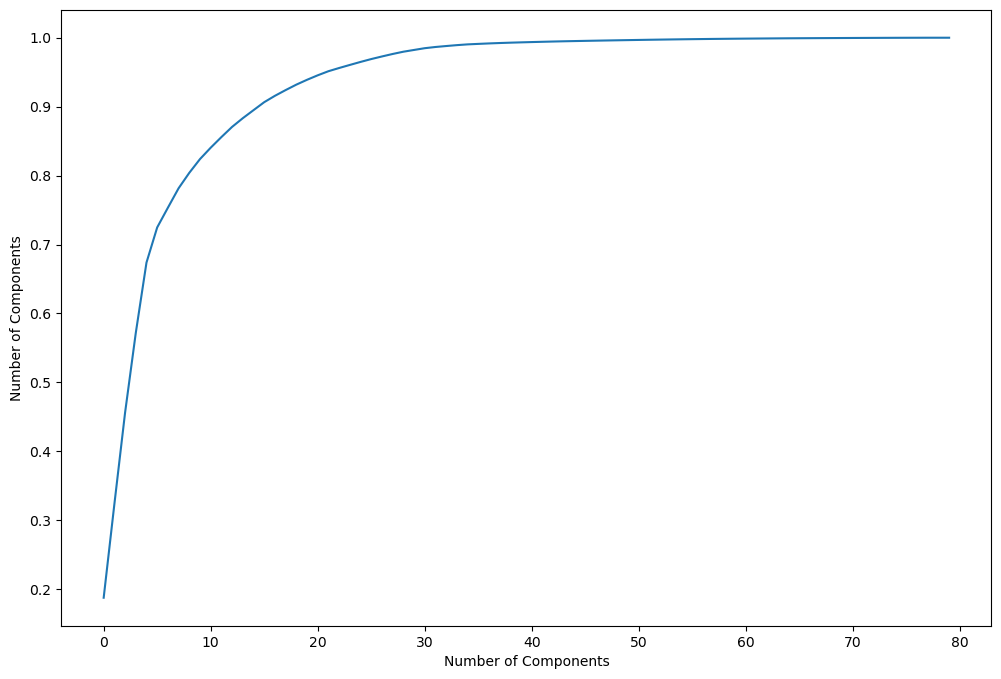

In [88]:
plt.figure(figsize = (12, 8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Number of Components')
plt.show()

In [89]:
np.cumsum(pca.explained_variance_ratio_)

array([0.18774128, 0.32350373, 0.4561854 , 0.57176384, 0.67386342,
       0.72483059, 0.75344527, 0.78163552, 0.80405243, 0.8239841 ,
       0.84047984, 0.85589486, 0.87067588, 0.88327898, 0.89491854,
       0.90650573, 0.91572894, 0.92403235, 0.93194527, 0.9389754 ,
       0.94547719, 0.95141761, 0.95607701, 0.96052032, 0.96488875,
       0.96903919, 0.97280873, 0.97641379, 0.9797012 , 0.98226534,
       0.984807  , 0.98655825, 0.98793924, 0.98924335, 0.99034352,
       0.99105057, 0.99172451, 0.99230608, 0.99281903, 0.99326887,
       0.99369656, 0.9940962 , 0.99448669, 0.99484207, 0.99514386,
       0.99544374, 0.99572863, 0.9960106 , 0.99627388, 0.99653615,
       0.99679056, 0.99704161, 0.99727481, 0.99749991, 0.99770808,
       0.99790739, 0.99809354, 0.99826785, 0.9984231 , 0.9985675 ,
       0.9987006 , 0.99882389, 0.99894353, 0.99906084, 0.99917425,
       0.99926249, 0.99934604, 0.99942482, 0.99949936, 0.99957301,
       0.99964028, 0.99970456, 0.99976535, 0.99982439, 0.99988

In [90]:
from sklearn.decomposition import PCA

pca_final = PCA(n_components = 15, random_state = 0)

X_train_pca = pca_final.fit_transform(X_train)

In [91]:
X_train_pca.shape

(31462, 15)

In [92]:
corrmat = np.corrcoef(X_train_pca.T)

<Axes: >

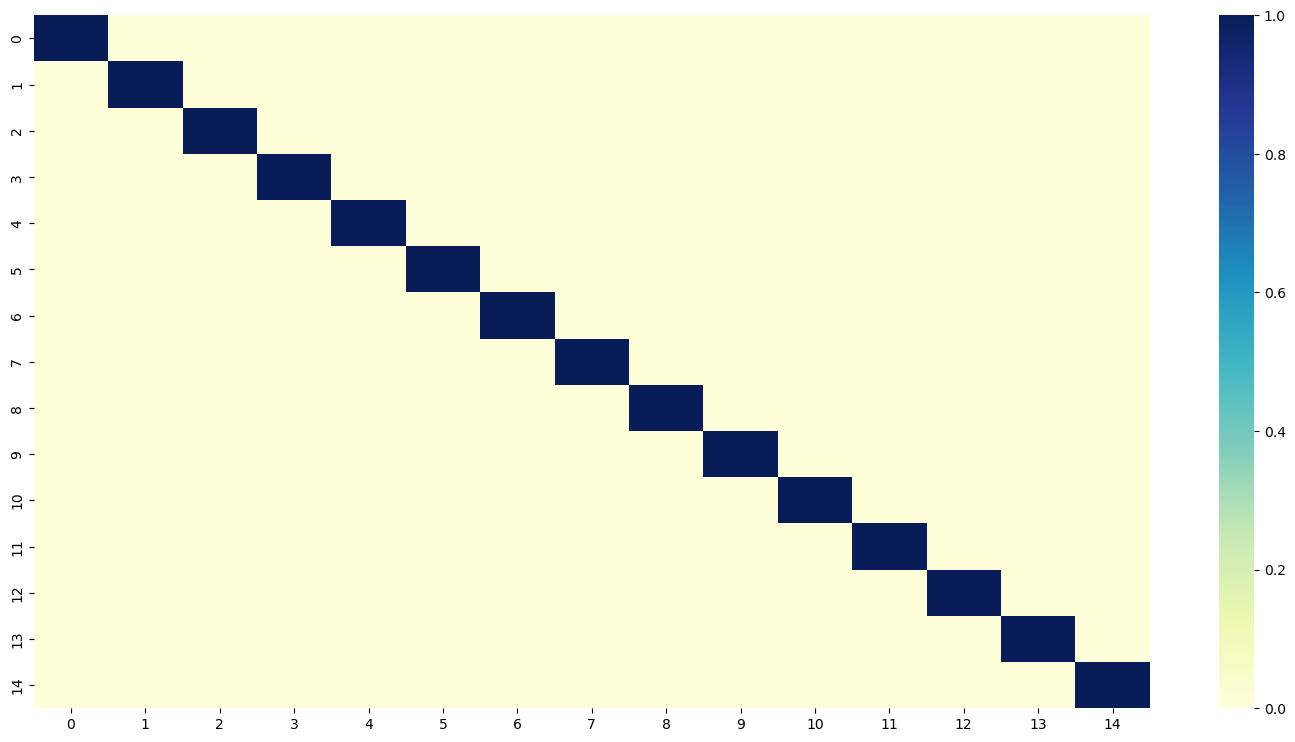

In [93]:
plt.figure(figsize=(18, 9))
sns.heatmap(corrmat, cmap="YlGnBu")

In [94]:
X_test.head()

,age,educational-num,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
22251,-1.635113,-1.612827,-0.23252,-0.219315,-2.579245,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
15880,0.193965,0.352592,-0.23252,-0.219315,-0.074097,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
21910,0.270177,0.352592,-0.23252,-0.219315,0.760953,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
28131,-1.254055,-1.612827,-0.23252,4.122404,-1.326671,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
27660,0.193965,-0.040492,-0.23252,-0.219315,0.760953,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [95]:
X_test_pca = pca_final.transform(X_test)

In [96]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [97]:
clf_logit_pca = LogisticRegression()
clf_tree_pca = DecisionTreeClassifier()
clf_svm_pca = SVC(probability = True)

In [98]:
classifiers = ['LogisticRegression', 'DecisionTreeClassifier', 'SVC']

In [99]:
models = {clf_logit_pca: 'LogisticRegression', 
          clf_tree_pca: 'DecisionTreeClassifier', 
          clf_svm_pca: 'SVC'}

In [100]:
def train(algo, name, X_train_pca, y_train, X_test_pca, y_test):
    algo.fit(X_train_pca, y_train)
    y_test_pred_pca = algo.predict(X_test_pca)
    return y_test_pred_pca


def performance(algo, name, X_test, y_test, y_test_pred_pca):
    # Accuracy Score
    score = metrics.accuracy_score(y_test, y_test_pred_pca)
    print('Accuracy score for', name, ':', score)
    
    # Confusion Metrics
    sns.heatmap(metrics.confusion_matrix(y_test, y_test_pred_pca), annot=True, fmt='d')
    plt.title("Confusion Matrix")
    plt.show()
    
    # Classification Report
    print(metrics.classification_report(y_test, y_test_pred_pca))
    
    # ROC AUC Score
    prob_pca = algo.predict_proba(X_test_pca)
    prob_pca = prob_pca[:, 1]
    roc_auc_pca = metrics.roc_auc_score(y_test, prob_pca)
    print(roc_auc_pca)
    
    # Plotting ROC Curve
    fpr_pca, tpr_pca, thresholds_pca = metrics.roc_curve(y_test, prob_pca)
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.plot(fpr_pca, tpr_pca, marker='.')
    plt.show()
    
    return roc_auc_pca


def main(models):
    auc = []
    for algo, name in models.items():
        print('#'*40, name, '#'*40)
        y_test_pred_pca = train(algo, name, X_train_pca, y_train, X_test_pca, y_test)
        roc_auc_pca = performance(algo, name, X_test, y_test, y_test_pred_pca)
        auc.append(roc_auc_pca)
    return auc

######################################## LogisticRegression ########################################
Accuracy score for LogisticRegression : 0.8407119021134594


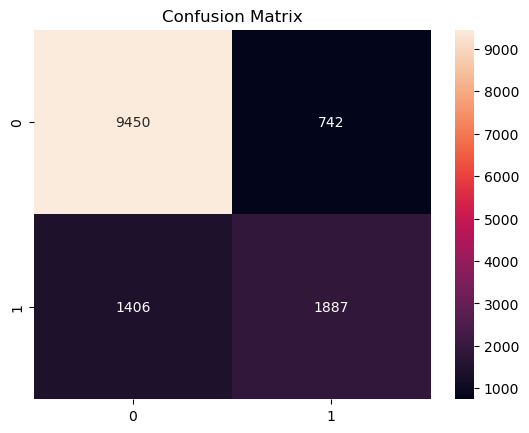

              precision    recall  f1-score   support

         0.0       0.87      0.93      0.90     10192
         1.0       0.72      0.57      0.64      3293

    accuracy                           0.84     13485
   macro avg       0.79      0.75      0.77     13485
weighted avg       0.83      0.84      0.83     13485

0.8952527952828916


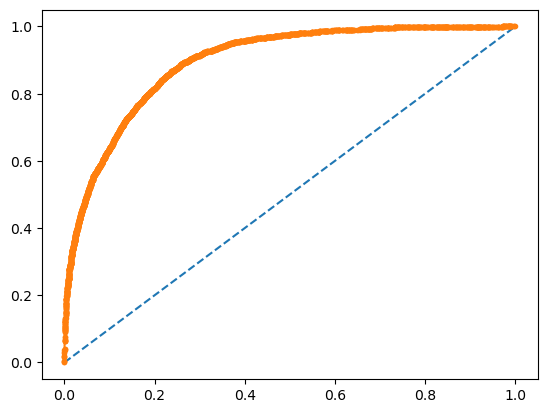

######################################## DecisionTreeClassifier ########################################
Accuracy score for DecisionTreeClassifier : 0.8004449388209122


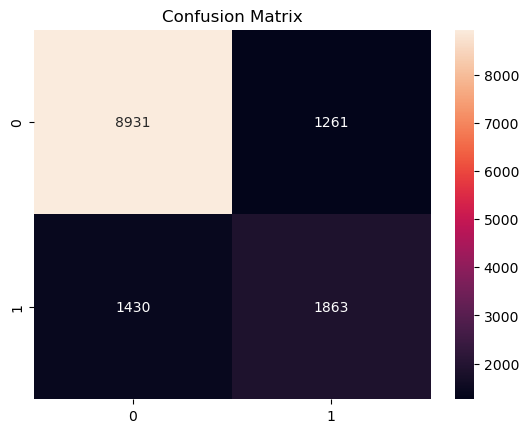

              precision    recall  f1-score   support

         0.0       0.86      0.88      0.87     10192
         1.0       0.60      0.57      0.58      3293

    accuracy                           0.80     13485
   macro avg       0.73      0.72      0.72     13485
weighted avg       0.80      0.80      0.80     13485

0.7489328637502795


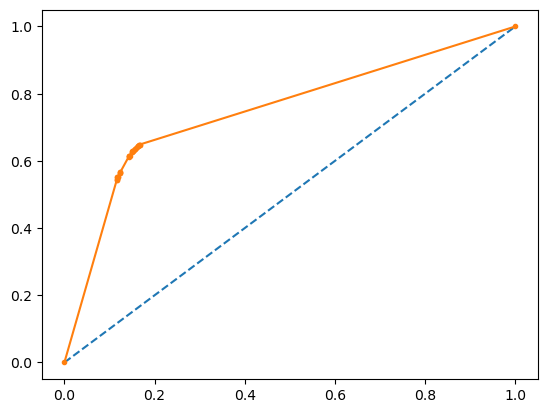

######################################## SVC ########################################
Accuracy score for SVC : 0.8491657397107898


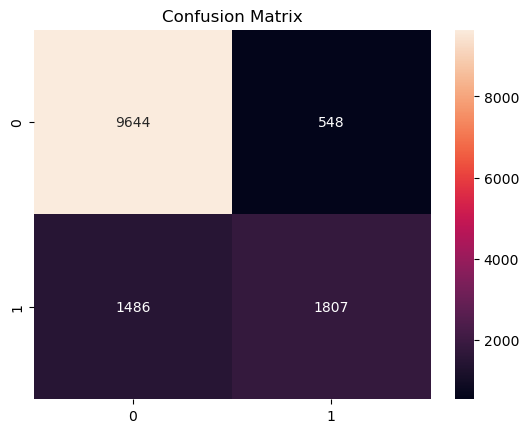

              precision    recall  f1-score   support

         0.0       0.87      0.95      0.90     10192
         1.0       0.77      0.55      0.64      3293

    accuracy                           0.85     13485
   macro avg       0.82      0.75      0.77     13485
weighted avg       0.84      0.85      0.84     13485

0.8839046606402144


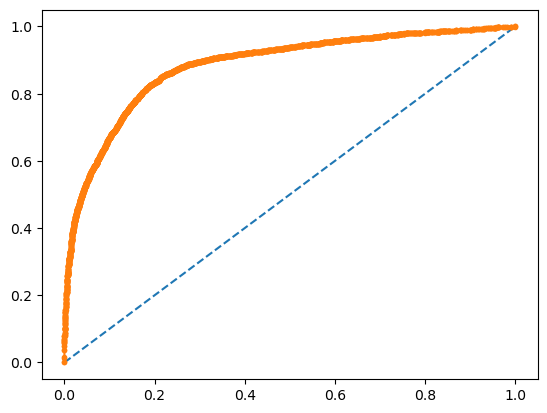

CPU times: total: 4min 13s
Wall time: 4min 23s


In [101]:
%%time

auc = main(models)

In [103]:
model_comp_df = pd.DataFrame(auc, columns = ['ROC AUC'], index = classifiers)

model_comp_df

,ROC AUC
LogisticRegression,0.895253
DecisionTreeClassifier,0.748933
SVC,0.883905


## Conclusion:

The analysis reveals significant income disparities based on race and gender.

For instance, a higher percentage of men across all races tend to earn more than $50K compared to women.  
Black females are more likely to earn less than $50K compared to black males, highlighting income inequality.

Furthermore, white males dominate the higher income bracket, while other racial groups are underrepresented.

This analysis demonstrates the power of machine learning models in predicting income categories but also emphasizes systemic inequalities that persist in the dataset